In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from tqdm import tqdm_notebook

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import torch

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from googletrans import Translator

translator = Translator()

def translate_to_korean(word):
    translation = translator.translate(word, dest='ko')
    return translation.text

In [ ]:
df = pd.read_pickle('../dataset/john_wick_4.p')
df.head()

,review,label
0,This was just like watching my nephew play a v...,0
1,Where do I start ? After fighting & killing ab...,0
2,After the hundredth henchman fails to shoot Jo...,0
3,It's nothing but overstylised overdone action ...,0
4,I am absolutely baffled by the 8.4 rating on h...,0


In [ ]:
bad_reviews = df['review'][df['label']==0].to_list()
good_reviews = df['review'][df['label']==1].to_list()

In [ ]:
len(bad_reviews), len(good_reviews)

(75, 75)

In [ ]:
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(sentence)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_tokens)
    return filtered_sentence

for i in tqdm_notebook(range(len(bad_reviews))):
    bad_reviews[i] = remove_stopwords(bad_reviews[i])

for i in tqdm_notebook(range(len(good_reviews))):
    good_reviews[i] = remove_stopwords(good_reviews[i])

/tmp/ipykernel_19493/161755455.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(bad_reviews))):


  0%|          | 0/75 [00:00<?, ?it/s]

/tmp/ipykernel_19493/161755455.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(good_reviews))):


  0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
bad_review_data = ''
for br in bad_reviews:
    bad_review_data = bad_review_data + ' ' + br

good_review_data = ''
for gr in good_reviews:
    good_review_data = good_review_data + ' ' + gr

In [ ]:
docs = [bad_review_data, good_review_data]

In [ ]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidf_weights(corpus):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()

    weights = []
    for row in tfidf_matrix:
        row_weights = {}
        for col, value in zip(row.indices, row.data):
            feature_name = feature_names[col]
            row_weights[feature_name] = value
        weights.append(row_weights)

    return weights

In [ ]:
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

weights = calculate_tfidf_weights(docs)

bad_word_score = {

}

good_word_score = {

}
for i, doc_weights in enumerate(weights):
    if i==0:
        for feature_name, weight in doc_weights.items():
            bad_word_score.setdefault(feature_name, weight)

    if i==1:
        for feature_name, weight in doc_weights.items():
            good_word_score.setdefault(feature_name, weight)
#     print(f"Document {i+1}:")
#     for feature_name, weight in doc_weights.items():
#         print(f"  {feature_name}: {weight}")

In [ ]:
bad_word_score = dict(sorted(bad_word_score.items(), key=lambda x: x[1])[::-1])

bad_word_score

{'movie': 0.4853573226945692,
 'wick': 0.2926777825293885,
 'john': 0.2682879673186061,
 'like': 0.19999648472841544,
 'one': 0.19267954016518074,
 'film': 0.15365583582792894,
 'action': 0.15121685430685072,
 'even': 0.1243880575749901,
 'movies': 0.11707111301175539,
 'fight': 0.11463213149067715,
 'could': 0.10975416844852068,
 'nothing': 0.10975416844852068,
 'the': 0.10731518692744244,
 'first': 0.10731518692744244,
 'really': 0.1048762054063642,
 'people': 0.09999824236420772,
 'scenes': 0.09999824236420772,
 'bad': 0.09999824236420772,
 'scene': 0.08780333475881655,
 'long': 0.0853643532377383,
 'get': 0.0853643532377383,
 'see': 0.08048639019558183,
 'story': 0.07804740867450359,
 'make': 0.07804740867450359,
 'time': 0.07560842715342536,
 'good': 0.07560842715342536,
 'many': 0.07316944563234712,
 'much': 0.07073046411126888,
 'fighting': 0.07073046411126888,
 'dog': 0.07073046411126888,
 'keanu': 0.06341351954803418,
 'would': 0.06341351954803418,
 'guy': 0.06341351954803418,

In [ ]:
good_word_score = dict(sorted(good_word_score.items(), key=lambda x: x[1])[::-1])

good_word_score

{'john': 0.3997950302055677,
 'wick': 0.37597745393800197,
 'action': 0.37257494304263544,
 'movie': 0.28921342610615536,
 'film': 0.1888393546928426,
 'one': 0.16672303387296014,
 'best': 0.1480092239484442,
 'chapter': 0.12929541402392827,
 'like': 0.12249039223319522,
 'time': 0.10547783775636255,
 'reeves': 0.10037407141331274,
 'scenes': 0.09527030507026295,
 'high': 0.09527030507026295,
 'also': 0.09356904962257967,
 'keanu': 0.08846528327952988,
 'see': 0.0816602614887968,
 'films': 0.0816602614887968,
 'new': 0.0816602614887968,
 'franchise': 0.0816602614887968,
 'movies': 0.07995900604111354,
 'series': 0.07995900604111354,
 'the': 0.076556495145747,
 'well': 0.07485523969806374,
 'great': 0.07315398425038047,
 'table': 0.07315398425038047,
 'character': 0.07145272880269721,
 'really': 0.06805021790733068,
 'fight': 0.06805021790733068,
 'story': 0.06294645156428087,
 'yen': 0.06294645156428087,
 'sequences': 0.06124519611659761,
 'good': 0.06124519611659761,
 'every': 0.05954

In [ ]:
bad = list(bad_word_score.keys())[:200]
good = list(good_word_score.keys())[:200]

In [ ]:
set(good)-set(bad)

{'able',
 'absolutely',
 'adkins',
 'almost',
 'along',
 'already',
 'always',
 'amazing',
 'anderson',
 'another',
 'anything',
 'arts',
 'assassin',
 'awesome',
 'beautiful',
 'berlin',
 'big',
 'bill',
 'brilliant',
 'brings',
 'brutal',
 'building',
 'caine',
 'camera',
 'cast',
 'chad',
 'choreographed',
 'cinematography',
 'continental',
 'definitely',
 'delivers',
 'director',
 'donnie',
 'easily',
 'experience',
 'fan',
 'fans',
 'fantastic',
 'fights',
 'find',
 'four',
 'fourth',
 'freedom',
 'full',
 'fun',
 'genre',
 'hand',
 'hiroyuki',
 'hour',
 'incredible',
 'lance',
 'left',
 'll',
 'looking',
 'lot',
 'main',
 'marquis',
 'martial',
 'matrix',
 'may',
 'mr',
 'must',
 'nobody',
 'others',
 'overall',
 'paris',
 'perfect',
 'performance',
 'pieces',
 'plays',
 'powerful',
 'rest',
 'role',
 'runtime',
 'said',
 'sanada',
 'scott',
 'screen',
 'second',
 'sequences',
 'set',
 'shots',
 'since',
 'skarsg책rd',
 'stahelski',
 'stars',
 'stunning',
 'stunt',
 'stunts',
 'ta

In [ ]:
list(set(bad)-set(good))

['unrealistic',
 'ridiculous',
 'dancing',
 'it',
 'ratings',
 'die',
 'loved',
 'roll',
 'start',
 'come',
 'took',
 'went',
 'try',
 'stopped',
 'hope',
 'bullet',
 'especially',
 'reason',
 'club',
 'everyone',
 'guy',
 'worse',
 'waste',
 'understand',
 'real',
 'hollywood',
 'pointless',
 'money',
 'cinema',
 'vs',
 'paid',
 'part',
 '3rd',
 'parody',
 'kill',
 'lack',
 'wanted',
 'sense',
 'keep',
 'fall',
 'something',
 'awful',
 'killed',
 'review',
 'fantasy',
 'chapters',
 'stupid',
 'spot',
 '20',
 'cars',
 'cringe',
 'gun',
 'horrible',
 'standing',
 'ending',
 'give',
 'killing',
 'completely',
 'clich챕',
 'dog',
 'car',
 'boring',
 'least',
 'thing',
 'liked',
 'nonsense',
 'worst',
 'watched',
 'sorry',
 'someone',
 'and',
 'falls',
 'head',
 'thought',
 'away',
 'guess',
 'gets',
 'guys',
 'seems',
 'literally',
 'shooting',
 'close',
 'excited',
 'else',
 'wait',
 'meaningless',
 'dance',
 'hit',
 'happened',
 'believable',
 'getting',
 'put',
 'stairs',
 'acting',
 'r

In [ ]:
list(set(bad)-set(good))

['unrealistic',
 'ridiculous',
 'dancing',
 'it',
 'ratings',
 'die',
 'loved',
 'roll',
 'start',
 'come',
 'took',
 'went',
 'try',
 'stopped',
 'hope',
 'bullet',
 'especially',
 'reason',
 'club',
 'everyone',
 'guy',
 'worse',
 'waste',
 'understand',
 'real',
 'hollywood',
 'pointless',
 'money',
 'cinema',
 'vs',
 'paid',
 'part',
 '3rd',
 'parody',
 'kill',
 'lack',
 'wanted',
 'sense',
 'keep',
 'fall',
 'something',
 'awful',
 'killed',
 'review',
 'fantasy',
 'chapters',
 'stupid',
 'spot',
 '20',
 'cars',
 'cringe',
 'gun',
 'horrible',
 'standing',
 'ending',
 'give',
 'killing',
 'completely',
 'clich챕',
 'dog',
 'car',
 'boring',
 'least',
 'thing',
 'liked',
 'nonsense',
 'worst',
 'watched',
 'sorry',
 'someone',
 'and',
 'falls',
 'head',
 'thought',
 'away',
 'guess',
 'gets',
 'guys',
 'seems',
 'literally',
 'shooting',
 'close',
 'excited',
 'else',
 'wait',
 'meaningless',
 'dance',
 'hit',
 'happened',
 'believable',
 'getting',
 'put',
 'stairs',
 'acting',
 'r

In [ ]:
bad

['movie',
 'wick',
 'john',
 'like',
 'one',
 'film',
 'action',
 'even',
 'movies',
 'fight',
 'could',
 'nothing',
 'the',
 'first',
 'really',
 'people',
 'scenes',
 'bad',
 'scene',
 'long',
 'get',
 'see',
 'story',
 'make',
 'time',
 'good',
 'many',
 'much',
 'fighting',
 'dog',
 'keanu',
 'would',
 'guy',
 'plot',
 'know',
 'point',
 'character',
 'blind',
 'thought',
 'go',
 'stupid',
 'watch',
 'man',
 'acting',
 'made',
 'way',
 'watching',
 'characters',
 'end',
 'gets',
 'times',
 'kill',
 'nonsense',
 'great',
 've',
 'shooting',
 'whole',
 'ridiculous',
 'last',
 'going',
 'every',
 'think',
 'franchise',
 'still',
 'head',
 'well',
 'around',
 'felt',
 'ever',
 'chapter',
 'boring',
 'ca',
 'new',
 'understand',
 'worst',
 '10',
 'better',
 'high',
 'minutes',
 'thing',
 'three',
 'best',
 'sense',
 'never',
 'money',
 'let',
 'seems',
 'top',
 'guys',
 'cinema',
 'seen',
 'life',
 'maybe',
 'killed',
 'gun',
 'getting',
 'hit',
 'die',
 'shot',
 'real',
 'back',
 'film

In [ ]:
set(bad)-set(good)

{'20',
 '3rd',
 'acting',
 'and',
 'away',
 'awful',
 'believable',
 'boring',
 'bullet',
 'car',
 'cars',
 'chapters',
 'cinema',
 'clich챕',
 'close',
 'club',
 'come',
 'completely',
 'cringe',
 'dance',
 'dancing',
 'die',
 'dog',
 'else',
 'ending',
 'especially',
 'everyone',
 'excited',
 'fall',
 'falls',
 'fantasy',
 'gets',
 'getting',
 'give',
 'guess',
 'gun',
 'guy',
 'guys',
 'happened',
 'head',
 'hit',
 'hollywood',
 'hope',
 'horrible',
 'it',
 'keep',
 'kill',
 'killed',
 'killing',
 'lack',
 'least',
 'liked',
 'literally',
 'loved',
 'meaningless',
 'money',
 'need',
 'nonsense',
 'paid',
 'parody',
 'part',
 'pointless',
 'put',
 'ratings',
 'real',
 'reason',
 'review',
 'reviews',
 'ridiculous',
 'roll',
 'seems',
 'sense',
 'shoot',
 'shooting',
 'someone',
 'something',
 'sorry',
 'spot',
 'stairs',
 'standing',
 'start',
 'stopped',
 'stupid',
 'thing',
 'thought',
 'took',
 'try',
 'understand',
 'unrealistic',
 'vs',
 'wait',
 'wanted',
 'waste',
 'watched',
 

In [ ]:
bc = list(set(bad)-set(good))
gc = list(set(good)-set(bad))

real_bad = [(x, bad_word_score[x]) for x in bad if x in bc]
real_good = [(x, good_word_score[x]) for x in good if x in gc]

In [ ]:
dict(real_bad)

{'dog': 0.07073046411126888,
 'guy': 0.06341351954803418,
 'thought': 0.056096574984799454,
 'stupid': 0.054846454835136636,
 'acting': 0.05121861194264298,
 'watching': 0.048779630421564746,
 'gets': 0.048779630421564746,
 'kill': 0.048779630421564746,
 'nonsense': 0.04799064798074456,
 'shooting': 0.04634064890048651,
 'ridiculous': 0.04634064890048651,
 'head': 0.04146268585833003,
 'boring': 0.04146268585833003,
 'understand': 0.04146268585833003,
 'worst': 0.04146268585833003,
 'thing': 0.039023704337251795,
 'sense': 0.039023704337251795,
 'money': 0.03658472281617356,
 'seems': 0.0342790342719604,
 'guys': 0.03414574129509532,
 'cinema': 0.03414574129509532,
 'killed': 0.03414574129509532,
 'gun': 0.03414574129509532,
 'getting': 0.03414574129509532,
 'hit': 0.03414574129509532,
 'die': 0.03170675977401709,
 'real': 0.03170675977401709,
 'least': 0.03170675977401709,
 'literally': 0.03170675977401709,
 'went': 0.030851130844764357,
 'everyone': 0.029267778252938848,
 'pointless'

In [ ]:
cloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 4000, height = 3000, random_state = 43).generate_from_frequencies(dict(real_good))#.generate_from_frequencies(dic)

# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('존윅good.jpg')

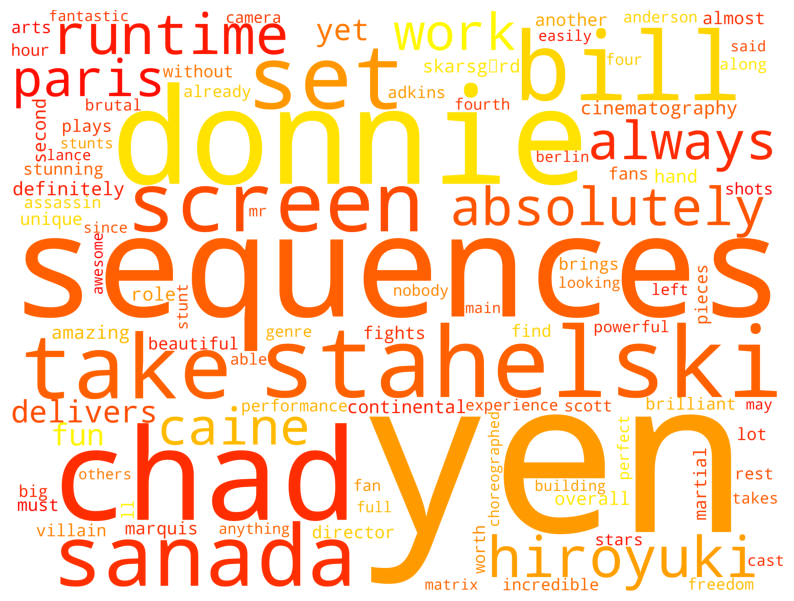

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
cloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 4000, height = 3000, random_state = 43).generate_from_frequencies(dict(real_bad))#.generate_from_frequencies(dic)

# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('존윅bad.jpg')

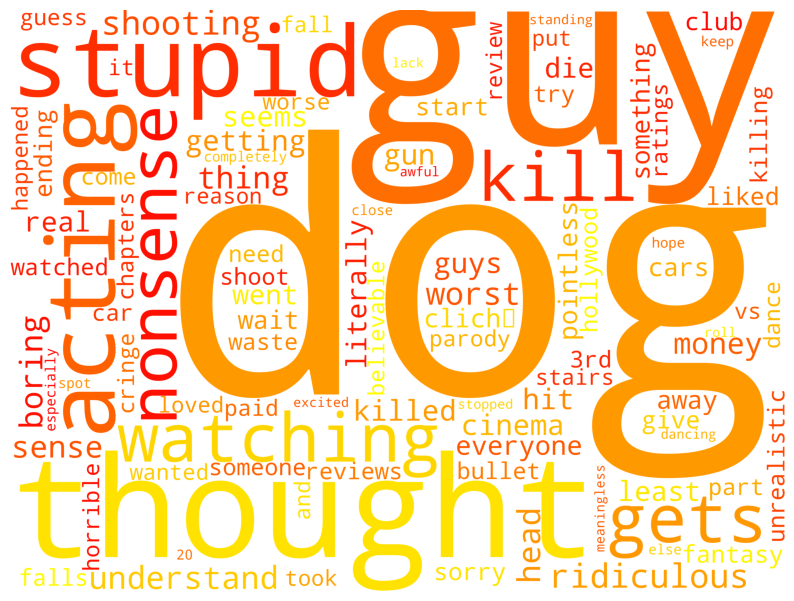

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
kor_real_good = []

for i in tqdm_notebook(range(len(real_good))):
    kor_real_good.append((translate_to_korean(real_good[i][0]), real_good[i][1]))

kor_real_good[:10]

/tmp/ipykernel_19493/2540777558.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(real_good))):


  0%|          | 0/98 [00:00<?, ?it/s]

[('만약에', 0.06294645156428087),
 ('시퀀스', 0.06124519611659761),
 ('도니', 0.05273891887818127),
 ('차드', 0.04782110343395533),
 ('스타헬스키', 0.04782110343395533),
 ('청구서', 0.04543004826225756),
 ('세트', 0.03912887529671514),
 ('가져가다', 0.03912887529671514),
 ('사나다', 0.0358658275754665),
 ('화면', 0.03402510895366534)]

In [ ]:
kor_real_bad = []

for i in tqdm_notebook(range(len(real_bad))):
    kor_real_bad.append((translate_to_korean(real_bad[i][0]), real_bad[i][1]))

kor_real_bad[:10]

/tmp/ipykernel_19493/2172110793.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(real_bad))):


  0%|          | 0/98 [00:00<?, ?it/s]

[('개', 0.07073046411126888),
 ('남자', 0.06341351954803418),
 ('생각', 0.056096574984799454),
 ('멍청한', 0.054846454835136636),
 ('연기', 0.05121861194264298),
 ('보고 있다', 0.048779630421564746),
 ('얻다', 0.048779630421564746),
 ('죽이다', 0.048779630421564746),
 ('무의미한 말', 0.04799064798074456),
 ('촬영', 0.04634064890048651)]

In [ ]:
import pickle
# save
with open('john_kor_real_good.pickle', 'wb') as f:
    pickle.dump(kor_real_good, f, pickle.HIGHEST_PROTOCOL)

# save
with open('john_kor_real_bad.pickle', 'wb') as f:
    pickle.dump(kor_real_bad, f, pickle.HIGHEST_PROTOCOL)